In [1]:
using CSV, DataFrames, Gadfly, GLM, Distributions

In [2]:
data = CSV.read("viscosite.csv")
head(data)

,Temp,Visc
1,138,5309
2,140,5516
3,144,5792
4,146,5585
5,148,5068
6,152,4413


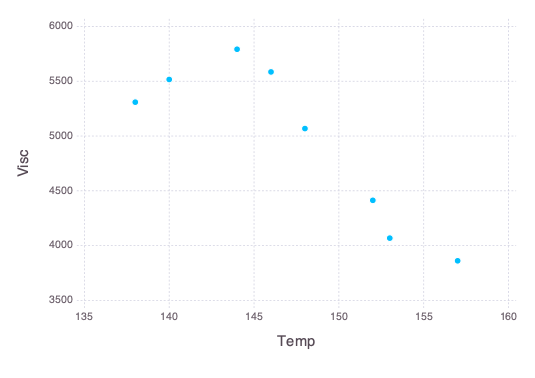

In [3]:
plot(data,x=:Temp, y=:Visc, Geom.point)

In [4]:
# Modèle 1
Y = collect(skipmissing(data[:Visc]))
X₁ = collect(skipmissing(data[:Temp]))
X₂ = X₁.^2
n = length(Y)
X = hcat(ones(n),X₁,X₂)
p = size(X,2)-1

SST = sum( (Y-mean(Y)).^2 )

β̂ = (X'X)\X'Y
e = Y - X*β̂
SSE = sum(e.^2)

R²₁ = 1 - SSE/SST * (n-1)/(n-p)

0.8627173272489974

In [5]:
# Modèle 2
Y = collect(skipmissing(data[:Visc]))
X₁ = collect(skipmissing(data[:Temp]))
X₂ = X₁.^2
X₃ = X₁.^3
n = length(Y)
X = hcat(ones(n),X₁,X₂,X₃)
p = size(X,2)-1

SST = sum( (Y-mean(Y)).^2 )

β̂ = (X'X)\X'Y
e = Y - X*β̂
SSE = sum(e.^2)

R²₂ = 1 - SSE/SST * (n-1)/(n-p)

0.977095705887369

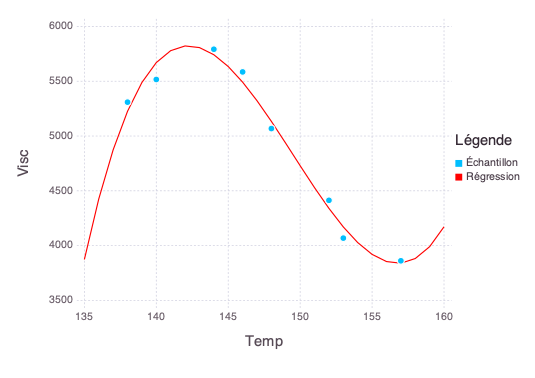

In [9]:
x = collect(135:160)
xx = hcat(ones(length(x)),x,x.^2,x.^3)

sample = layer( data,x=:Temp, y=:Visc, Geom.point, Theme(default_color="deepskyblue"))
regression = layer(x=x, y = xx*β̂, Geom.line, Theme(default_color="red"))

plot(sample,regression, Guide.manual_color_key("Légende", ["Échantillon", "Régression"], ["deepskyblue","red"]))